In [8]:
# minimal packages to import
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import stats #for statistical procedures
#additional library for visualization
import seaborn as sns

In [9]:
#!wget -P /content/drive/MyDrive/MyDatasetFolder/ https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json
#!wget -P /content/drive/MyDrive/MyDatasetFolder/ https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json
# setting the filepath for the dataset, depending on where you saved them
filepath_books = "/content/drive/MyDrive/MyDatasetFolder/lighter_books.json"
filepath_authors = "/content/drive/MyDrive/MyDatasetFolder/lighter_authors.json"


##**[RQ1]** ***Exploratory Data Analysis (EDA)***

## **Importing the authors dataset**

The authors dataset is lighter than the books datset, so we can directly import it and create a dataframe with  "lines = True" option in the pandas method "pd.read_json()"

In [52]:
df_authors = pd.read_json(filepath_authors, lines = True) #with the line = T option we are creating a dataframe

Let's clean a bit our dataset from Nan and duplicates to avoid misleading statistics.

We can use:


*   df. to **check for duplicates** in the dataframe rows
*   df.drop_duplicates() to **remove the duplicates**, if there are any
*   df.dropna() to **remove Nan** values if needed (note that this function will drop the entire row of a Nan value)



In [53]:
authors = df_authors.copy() #let's work on a copy of our dataset to preserve the original in case of mistakes

#Let's check the Nan values
empty_string = np.where(authors.applymap(lambda x : x == ""))
print("\033[1m" + "Nan values in the dataset: " + "\033[0m" + str(len(empty_string[0]))) #103377
empty_perc = (103377/(authors.shape[0]*authors.shape[1]))*100
print("\033[1m" + "The % of Nan values in the dataset: " + "\033[0m" + str(empty_perc)) #2.45%

'''
The nan values are just the 2.45% of the whole dataset so they're negligible.
'''

#Applying the df.drop_duplicates() it gave back "unhashable type: 'list" error so let's see what are the datatypes of our dataframe:
authors.info()

Nan values in the dataset: 103377
The % of Nan values in the dataset: 2.448993225629465
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [54]:
#Since there are some list-like data let's make it so we can use drop_duplicates() and df.duplicated() functions:
authors["work_ids"] = authors["work_ids"].apply(tuple)
authors["book_ids"] = authors["book_ids"].apply(tuple)

#Let's check if any duplicates are present in our author dataset:
duplicate_authors = authors[authors.duplicated()]
duplicate_authors
#apparently no duplicates are present in the author dataset

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count


##**Dataset overview and statistical summary**
Now that we have cleaned our dataset we can go to the next step, which is dataset informations and statistics.

We can use the following Pandas functions to have a better understanding of our dataset:


*   df.head()  to have a **quick dataset overview**
*   df.shape  to get the **dataframe shape**
*   df.info()  overview of the **dataset datatypes**, it will be useful for the visualization tools we will use later on
*   df.describe()  will provide **summary statistics**

> Let's have a quick overview of the data by displaying the first rows with the **df.head()** pandas function:

In [55]:
authors.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"(3078186, 135328, 1877624, 74123, 3078120, 104...","(386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"(613469, 2305997, 940892, 2611786, 7800569, 31...","(9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"(17150, 808427, 20487307, 90550, 25460625, 171...","(349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"(4417, 14300808, 14780, 3796968, 44703121, 103...","(40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"(13330815, 19109351, 42306244, 72694240, 26291...","(8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


> With the pandas method **df.shape()** and the pandas function **df.info()** we can provide useful informations like the dataframe shape and datatypes:

In [56]:
print("\033[1m" + "The shape of the authors dataset is: " + "\033[0m" + str(authors.shape))
authors.info()

The shape of the authors dataset is: (351767, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


The authors dataset has 351767 rows and 12 columns that are:

 |Column|Dtype|
 |---|---|  
 | ratings_count|int64|  
 |average_rating|float64|
 |text_reviews_count|int64|  
 |work_ids|object|
 |book_ids|object|
 |works_count|int64|  
 |id|int64|
 |name|object|
 |gender|object|
 |image_url|object|
 |about|object|
 |fans_count|int64|  





> To get the summary statistics for the numerical columns we can use the pandas function **df.describe()**:

In [57]:
authors.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


|index|ratings\_count|average\_rating|text\_reviews\_count|works\_count|id|fans\_count|
|---|---|---|---|---|---|---|
|**count**|351767\.0|351767\.0|351767\.0|351767\.0|351767\.0|351767\.0|
|**mean**|4770\.586308550831|3\.651194313281234|330\.9932426862099|25\.937137366495435|7751861\.1911975825|111\.61573143586521|
|**std**|97693\.95378788894|1\.2114816423862018|3857\.539191162929|3066\.0828516236816|6578409\.001586645|2661\.018138865969|
|**min**|-41\.0|-31\.0|0\.0|0\.0|4\.0|-33\.0|
|**25%**|6\.0|3\.6|1\.0|2\.0|1535315\.0|1\.0|
|**50%**|39\.0|3\.95|8\.0|6\.0|6470396\.0|4\.0|
|**75%**|310\.0|4\.25|53\.0|15\.0|14340409\.5|20\.0|
|**max**|27003752\.0|5\.0|608956\.0|1775176\.0|21248016\.0|766035\.0|

\\
25%, 50%, 75% are, respectively, the 1st, 2nd and 3rd quartile.

\\
By analyzing these table statistics we can see that:

*   As suggested from the std (standard deviation) value the "ratings_count"
values are pretty spread out, while the "average_rating" are pretty much centered around the mean.
*   We have an unsual negative min for "ratings_count", "average_rating" and "fans_count", that could indicate errors or inconsistencies in the data.
*  By looking at the big differences between the 75% quartile and the maximum value there might be some outliers in the "ratings_counts", "text\_reviews\_count", "works\_count", "fans\_count" and "id" columns. \\
To deal with outliers we can compute the interquartile range (IQR), that is (Q3 - Q1), and keep the values within the IQR range.  

Another value that might be useful to check for outliers is the kurtosis:
> A *kurtosis > 0* indicates a distribution with heavy tails or outliers, while a *kurtosis < 0* indicates a distribution with light tails or lack of outliers.


##**Visualization tools**

> We can make a boxplot without the outliers in order to visualize better the distribution of the columns:

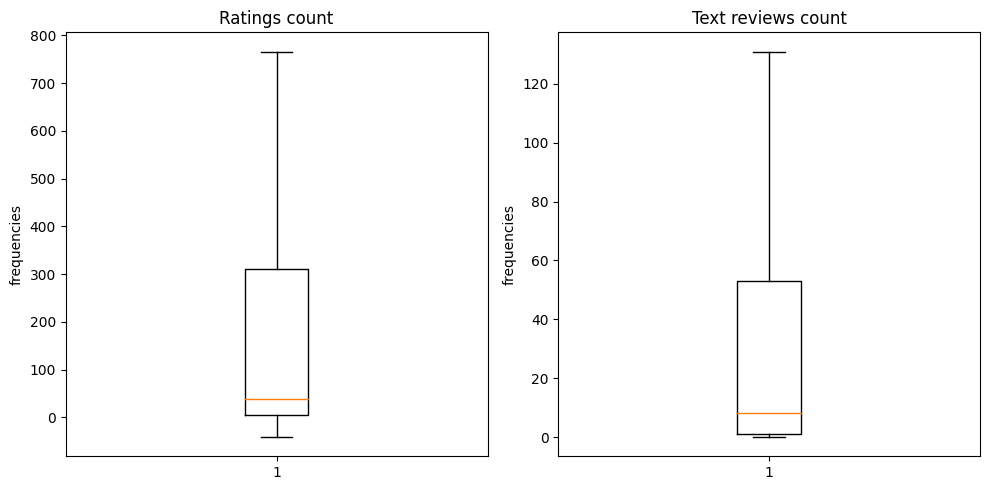

In [58]:
#define plotting region (1 rows, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#create boxplot without outliers in each subplot
axs[0].boxplot(authors["ratings_count"], showfliers = False) #showfliers = False plots the boxplot withouth the outliers
axs[0].set_title('Ratings count')
axs[0].set_ylabel('frequencies')

axs[1].boxplot(authors["text_reviews_count"],  showfliers = False)
axs[1].set_title('Text reviews count')
axs[1].set_ylabel('frequencies')

# Show the plot
plt.tight_layout()
plt.show()


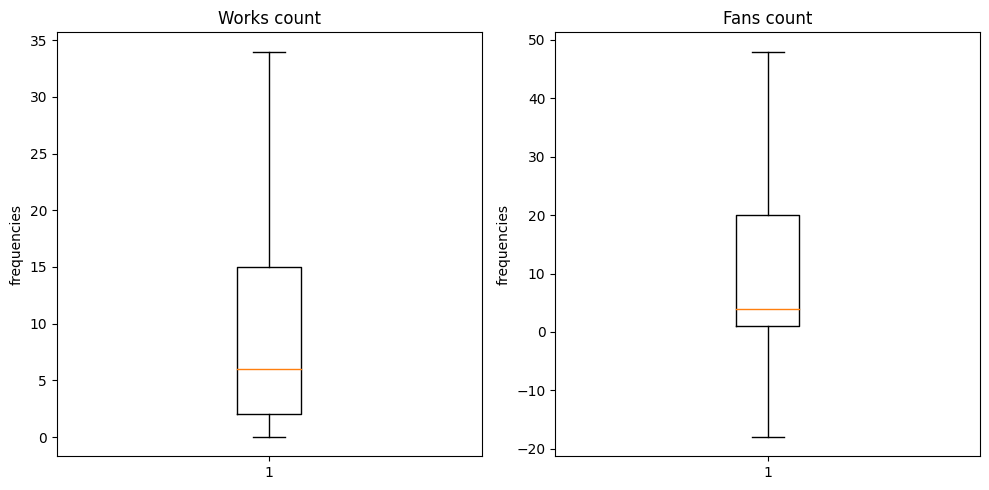

In [59]:
#define plotting region (1 rows, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#create boxplot without outliers in each subplot
axs[0].boxplot(authors["works_count"], showfliers = False)
axs[0].set_title('Works count')
axs[0].set_ylabel('frequencies')

axs[1].boxplot(authors["fans_count"],  showfliers = False)
axs[1].set_title('Fans count')
axs[1].set_ylabel('frequencies')

# Show the plot
plt.tight_layout()
plt.show()

> From this boxplot we can see that there is a positive skewness in all the boxplot, really evident in the first 3 ones (therefore excluding the Fans count one). \\
By looking at this representation can make the same deductions we made by looking at the statistical summaries in the table above:
* We have an unsual negative min for "ratings_count", "average_rating" and "fans_count".
* The difference between the 75% quartile and the maximum suggets the presence of outliers in the distributions, for which we can try and compute the kurtosis.


Let's compute the Kurtosis for the distributions above:

In [60]:
from scipy.stats import kurtosis

#Kurtosis for ratings count
kurt_rc = kurtosis(authors["ratings_count"], fisher=False, bias=False) #with Fisher = True it uses Fisher approximation which normalises the kurtosis to 0
#and bias = False corrects for statistical biases

#Kurtosis for text reviews count
kurt_trc = kurtosis(authors["text_reviews_count"], fisher=False, bias=False)

#Kurtosis for works count
kurt_wc = kurtosis(authors["works_count"], fisher=False, bias=False)

#Kurtosis for fans count
kurt_fc = kurtosis(authors["fans_count"], fisher=False, bias=False)

#For a more neat output let's create a dataframe with pandas:
df_kurtosis = pd.DataFrame({
    'Column': ['ratings_count', 'text_reviews_count', 'works_count', 'fans_count'],
    'Kurtosis': [kurt_rc, kurt_trc, kurt_wc, kurt_fc]
})

print(df_kurtosis)

               Column       Kurtosis
0       ratings_count   23303.048215
1  text_reviews_count    6153.238083
2         works_count  319561.093364
3          fans_count   28305.159411


|index|Colum|Kurtosis|
|---|---|---|
|0|       ratings_count|   23303.048215|
|1|  text_reviews_count|    6153.238083|
|2|         works_count|  319561.093364|
|3|          fans_count|   28305.159411|

> From the kurtosis table we can see that the distributions that has the higher value is the works_count (kurtosis = 319561.093364), while the distribution with the lowest kurtosis is the text reviews count (kurtosis = 6153.238083). This confirms what we saw with the summary statistics: all the distribution that were taken into account have outliers, and among them the one with the highest number of outliers is the works count.

> These kurtosis values are really high, so the columns are not suitable for statistical analysis being performed.
If we want to perform some sort of statistical analysis we need to clean the data.

We can also use other visualization tools to explore some of the distribution of the columns with values that are both numerical and not, and also to see the relationships between some of them.

**Barplots and histograms**

> We start with the histograms and the barplots for the numerical columns. \\
Computing histograms might be useful to actually see if, as suggested from the standard deviation values, the "ratings_count" are pretty spread out, while the "average_rating" are pretty much centered around the mean.

*Fans count*

Number of negative fans count:23
Number of negative fans count after turning them ino np.nan:0
Author that has the highest fans count:Stephen King


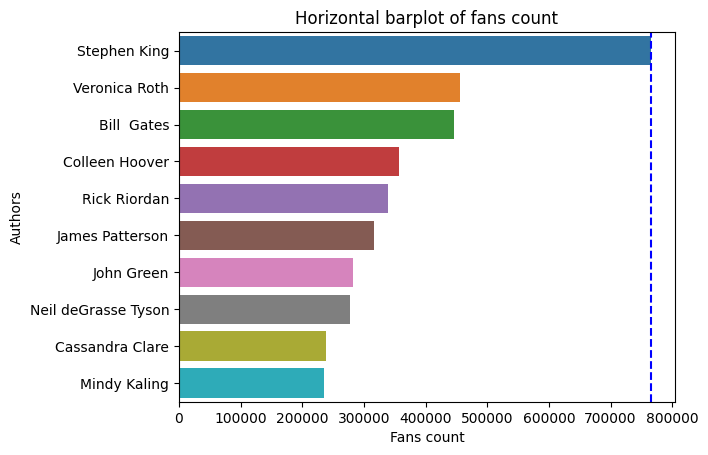

In [61]:
#fans_count
#let's check how many negative fans count there are and, if there are any, turn them into np.nan (numpy nan values):
print("\033[1m" + "Number of negative fans count:" + "\033[0m" + str(len(authors[authors['fans_count']<0]))) # 23 negative fans count

authors['fans_count'] = authors['fans_count'].apply(lambda x : np.nan if x <= 0 else x)

print("\033[1m" + "Number of negative fans count after turning them ino np.nan:" + "\033[0m" + str(len(authors[authors['fans_count']<0]))) # 0 negative fans count
#now we don't have negative numbers and we can try to plot the histogram and see what happens:

#let's print just the top 10 authors with the highest fans count because of the computational running time:
sum_fans = authors.groupby('name')['fans_count'].sum()
top_authors = sum_fans.sort_values(ascending = False)
top_10_authors = top_authors.head(10)

authors_pd =top_10_authors.reset_index()
authors_pd.columns = ['author_name', 'fans_count']

#Let's see who, among all the authors in the dataset, has the highest fans count
#highest fan count
highest_fan_count = authors['fans_count'].max()
out = authors[authors["fans_count"] == highest_fan_count]
print("\033[1m" + "Author that has the highest fans count:" + "\033[0m" + str(out["name"].values[0])) #Stephen King (766035 fans)

sns.barplot(x = authors_pd['fans_count'], y = authors_pd['author_name'], orient = 'h')
plt.axvline(x=766035, color='blue', linestyle='--', label='Threshold') # let's add this line to the barplot


plt.xlabel('Fans count')
plt.ylabel('Authors')
plt.title('Horizontal barplot of fans count')
plt.show()

In [62]:
#Let's see who, among all the authors in the dataset, has the lowest fans count
lowest_fan_count = authors['fans_count'].min()
out = authors[authors["fans_count"] == lowest_fan_count]
print("\033[1m" + "Authors that have the lowest fans count:" + "\033[0m" + str(out["name"].values[0])) #we print just the first one because they are too many
print("\033[1m" + "Fans count:" + "\033[0m" + str(out["fans_count"].values[0])) # 1 fan (we print just the first one because they are too man)
print("\033[1m" + "Number of authors that have the lowest fans count:" + "\033[0m" + str(len(out["name"]))) #43169 authors with just 1 fan

Authors that have the lowest fans count:Sophie Braimbridge
Fans count:1.0
Number of authors that have the lowest fans count:43169


> From the horizontal barplot we can see that among the top 10 authors with the highest fans count *Stephen King* is the first one, with 766035 fans, while on the other hand a lot of authors have just 1 fan (43169). \\
The range of fans count is pretty wide, going from 1 to 766035.

*Text reviews count*

Number of negative text reviews count:0
Stephen King text reviews count:608956
J.K. Rowling text reviews count:606373


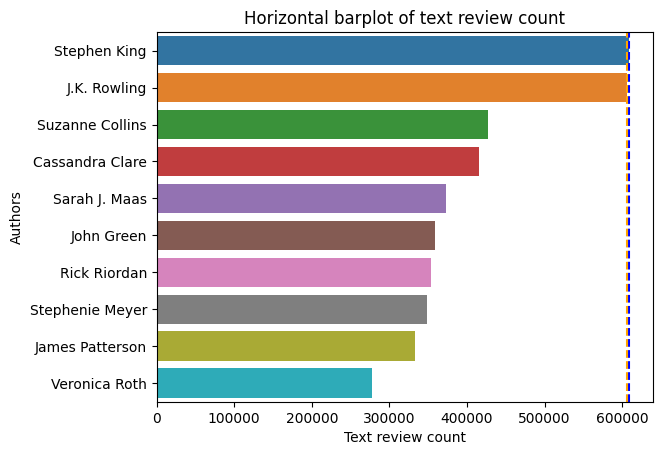

In [63]:
#text_reviews_count
#let's check how many negative text reviews count there are and, if there are any, turn them into np.nan (numpy nan values):
print("\033[1m" + "Number of negative text reviews count:" + "\033[0m" + str(len(authors[authors['text_reviews_count'] < 0]))) #0 negative text reviews count
#We can see that we don't have negative numbers so we can try to plot the histogram and see what happens:

#let's print just the top 10 authors with the highest text reviews count because of the computational running time:
sum_fans = authors.groupby('name')['text_reviews_count'].sum()
top_authors = sum_fans.sort_values(ascending = False)
top_10_authors = top_authors.head(10)

authors_pd =top_10_authors.reset_index()
authors_pd.columns = ['author_name', 'text_reviews_count']

sns.barplot(x = authors_pd['text_reviews_count'], y = authors_pd['author_name'], orient = 'h')

#text reviews count of Stephen King
out = authors[authors["name"] == "Stephen King"]
print("\033[1m" + "Stephen King text reviews count:" + "\033[0m" + str(out["text_reviews_count"].values[0])) #608956 text reviews count

#text reviews count of J.K. Rowling
out = authors[authors["name"] == "J.K. Rowling"]
print("\033[1m" + "J.K. Rowling text reviews count:" + "\033[0m" + str(out["text_reviews_count"].values[0])) #606373 text reviews count

plt.axvline(x=608956, color='blue', linestyle='--', label='Threshold') # let's add this line to the barplot
plt.axvline(x=606373, color='orange', linestyle='--', label='Threshold') # let's add this line to the barplot

plt.xlabel('Text review count')
plt.ylabel('Authors')
plt.title('Horizontal barplot of text review count')
plt.show()

> From the plot we can see that among the top 10 authors with the highest text reviews count *Stephen King* and *J.K. Rowling* are almost at the same level with respectilvely 608956 and 606373 text reviews count. \\
Remembering that Stephen King is among the top 10 author for the fans count and seeing that his text reviews are more or less equal to J.K. Rowling ones it could be interesting to see the latter fans count.

> So let's see the lowest text review count, and also the fans count for J.K. Rowling

In [64]:
#lowest text review count
lowest_text_review_count = authors['text_reviews_count'].min()
out = authors[authors["text_reviews_count"] == lowest_fan_count]
print("\033[1m" + "Authors that have the lowest text reviews count:" + "\033[0m" + str(out["name"].values[0])) #we print just the first one because they are too many
print("\033[1m" + "Text reviews count:" + "\033[0m" + str(out["text_reviews_count"].values[0])) #1 text review count (we print just the first one because they are too many)
print("\033[1m" + "Number of authors that have the lowest text reviews count:" + "\033[0m" + str(len(out["name"]))) #there are multiple authors (29685) with just 1 text review count

#fan count for J.K. Rowling
out = authors[authors["name"] == "J.K. Rowling"]
print("\033[1m" + "J.K. Rowling fans count:" + "\033[0m" + str(out["fans_count"].values[0])) #213208 fans count

Authors that have the lowest text reviews count:Rob Orsini
Text reviews count:1
Number of authors that have the lowest text reviews count:29685
J.K. Rowling fans count:213208.0


> From this results we can see that there are 29685 authors who have just 1 text review count (lowest one). \\
Also the fans count of J.K. Rowling is 213208, which is much lower than Stephen King's one (766035), but still they have almost the same text review count.

*Average rating*

> Let's see if, as suggested from the standard deviation value, the "ratings_count" are pretty spread out, while the "average_rating" are pretty much centered around the mean. For that we plot an histogram for each of the distributions:

Number of negative average rating:1
Number of negative average rating after turning them into np.nan:0


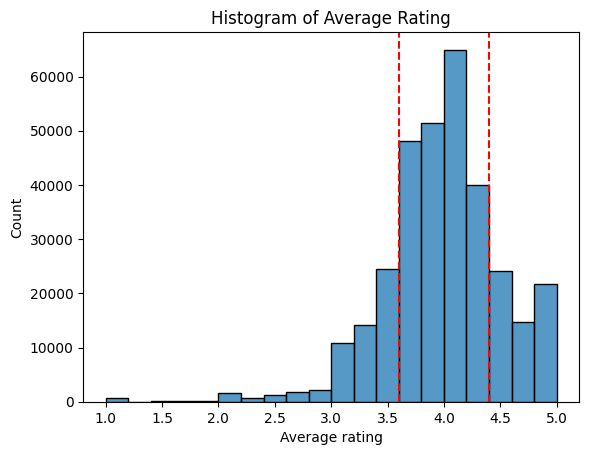

In [65]:
#average_rating
#let's check how many negative average rating there are and, if there are any, turn them into np.nan (numpy nan values):
print("\033[1m" + "Number of negative average rating:" + "\033[0m" + str(len(authors[authors['average_rating']< 0]))) # 1 negative average rating

authors['average_rating'] = authors['average_rating'].apply(lambda x : np.nan if x <= 0 else x)
authors.dropna()

print("\033[1m" + "Number of negative average rating after turning them into np.nan:" + "\033[0m" + str(len(authors[authors['average_rating']<0]))) # 0 negative fans count
#now we don't have negative numbers and we can try to plot the histogram and see what happens:

hist = sns.histplot(authors, x="average_rating", bins = 20)
plt.axvline(x=3.60, color='red', linestyle='--', label='Threshold')
plt.axvline(x=4.40, color='red', linestyle='--', label='Threshold')

plt.xlabel('Average rating')
plt.ylabel('Count')
plt.title('Histogram of Average Rating')
plt.show()


> We can observe that the highest ratings count are concentrated between 3.60 and 4.40 (red dotted lines in the graph), it actually confirms what we saw with the statistical summary: the "average_rating" are pretty much centered around the mean. \\
As one would expect the lowest values are the one corresponding to the ratings between to 1, 2 and 3.

*Ratings count*

> Now we can plot a density histogram withouth the outliers to have a better look at the ratings count distribution:

Number of negative ratings count:4
Number of negative ratings count after turning them into np.nan:0
mean:117.01795755622217
min:1.0
max:945.0


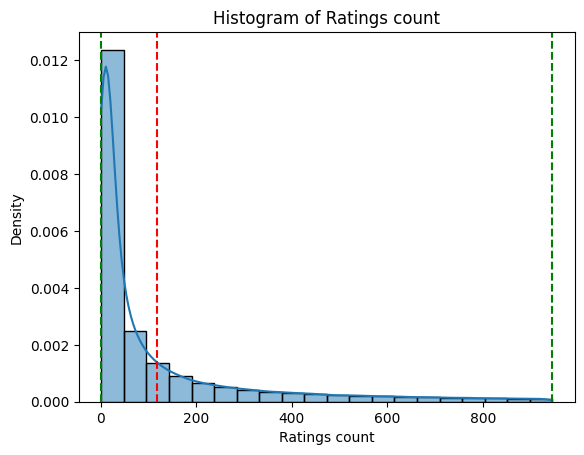

In [66]:
#ratings_count
#let's check how many negative ratings count there are and, if there are any, turn them into np.nan (numpy nan values):
print("\033[1m" + "Number of negative ratings count:" + "\033[0m" + str(len(authors[authors['ratings_count']< 0]))) # 4 negative average rating

authors['ratings_count'] = authors['ratings_count'].apply(lambda x : np.nan if x <= 0 else x)
authors.dropna()

print("\033[1m" + "Number of negative ratings count after turning them into np.nan:" + "\033[0m" + str(len(authors[authors['ratings_count']< 0]))) # 0 negative fans count
#now we don't have negative numbers and we can try to plot the histogram and see what happens:

'''
From the statistical summary we saw that this distribution has a lot of outliers, and to plot an histogram we have to find a way to filter out those.
For example, as we said before, we can compute the IQR (interquartile range) and keep the values within that range.
'''
Q1 = authors['ratings_count'].quantile(0.25)
Q3 = authors['ratings_count'].quantile(0.75)
IQR = Q3 - Q1

authors = authors[~((authors['ratings_count'] < (Q1 - 1.5 * IQR)) | (authors['ratings_count'] > (Q3 + 1.5 * IQR)))]
ratings_count_mean = authors["ratings_count"].mean()
ratings_count_min = authors["ratings_count"].min()
ratings_count_max = authors["ratings_count"].max()

print("\033[1m" + "mean:" + "\033[0m" + str(ratings_count_mean))
print("\033[1m" + "min:" + "\033[0m" + str(ratings_count_min))
print("\033[1m" + "max:" + "\033[0m" + str(ratings_count_max))

hist = sns.histplot(authors, x="ratings_count", bins = 20, stat = "density", kde = True)

plt.axvline(x= ratings_count_mean, color='red', linestyle='--', label='Threshold')
plt.axvline(x= ratings_count_min, color='green', linestyle='--', label='Threshold')
plt.axvline(x= ratings_count_max, color='green', linestyle='--', label='Threshold')

plt.xlabel('Ratings count')
plt.ylabel('Density')
plt.title('Histogram of Ratings count')
plt.show()


> As suggested from the standard deviation of the statistical summary, this distribution is pretty spread out and not centered around the mean (117) as the average ratings one. \\
The range of the distribution withouth the outliers goes from 1 to 945 and we can see that we have more lower ratings counts than higher ones.  

**Pieplot and Barplot**

Let's do a Pieplot to visualize the gender of the authors, and a barplot to try and see the relationship (correlation) that may exist between paired columns (for example average_rating and fans_count)

*Pieplot*

The gender counts is:
male      117026
Others     93123
female     87539
Name: gender, dtype: int64


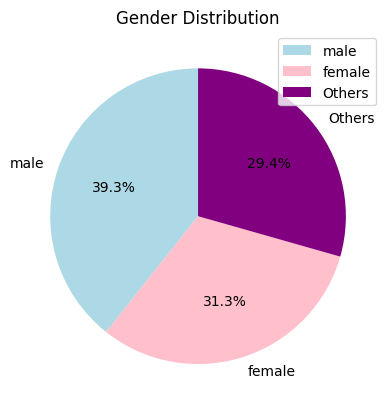

'\n#Let\'s see the percentage of male, female and "Other" genders:\nlen(authors[authors[\'gender\']== "male"]) #138179\nlen(authors[authors[\'gender\']== "female"]) #109878\nlen(authors[\'gender\']) #351767\n\nmale_perc = 138179/351767 #39.3%\nprint(male_perc)\nfemale_perc = 109878/351767 #31.2%\nprint(female_perc)\n'

In [68]:
#To compute the Pieplot we need to count the occurences of each gender:
unique_genders = authors['gender'].unique() #to have an idea on how many genders there are

#there are a lot of other genders aside from 'male' and 'female', so let's put the other ones into "Others", and the empty strings as Nan

def gender_mapping(gender):
  if gender == "male":
    return "male"
  elif gender == "female":
    return "female"
  elif gender == "":
    return "Nan"
  else:
    return "Others"

authors["gender"] = authors["gender"].map(gender_mapping)

gender_counts = authors['gender'].value_counts() #value_counts() because to do the pieplot you need actual numbers
print("\033[1m" + "The gender counts is:\n" + "\033[0m"+ str(gender_counts))

#then let's do the pieplot on the gender
colors = sns.color_palette('pastel')
mylabels = ("male", "female", "Others")
plt.pie(gender_counts, labels = mylabels, startangle = 90, colors = ("lightblue", "pink", "purple"), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.legend()
plt.show()

'''
#Let's see the percentage of male, female and "Other" genders:
len(authors[authors['gender']== "male"]) #138179
len(authors[authors['gender']== "female"]) #109878
len(authors['gender']) #351767

male_perc = 138179/351767 #39.3%
print(male_perc)
female_perc = 109878/351767 #31.3%
print(female_perc)
'''

*Barplot for correlation visualization*

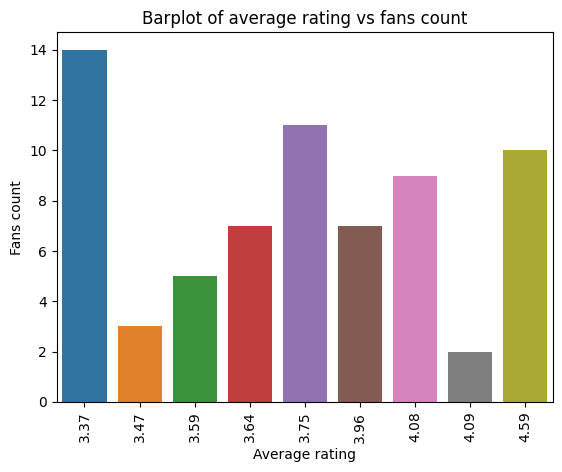

In [69]:
#Because of the computational running time we will print the barplot of the first 10 average ratings vs fans count

#To deal with outliers in the distribution we filter them out based-off the IQR (interquartile range)
Q1 = authors['fans_count'].quantile(0.25)
Q3 = authors['fans_count'].quantile(0.75)
IQR = Q3 - Q1

authors = authors[~((authors['fans_count'] < (Q1 - 1.5 * IQR)) | (authors['fans_count'] > (Q3 + 1.5 * IQR)))]

_10_avg_rating = authors["average_rating"].head(10)
plt.xticks(rotation=90) #to avoid overlapping x-axis values
sns.barplot(authors, x = _10_avg_rating, y='fans_count')


plt.xlabel('Average rating')
plt.ylabel('Fans count')
plt.title('Barplot of average rating vs fans count')
plt.show()

> From this barplot we can see that there is a non-linear relationship between average rating and fans count, since for example the average ratings of 3.87 or 4.09 have a fans count lower than the 3.75 one.

>

##**Retrieving the books dataset**

Since it's a very big dataset and it's not convenient to import it all directly into a PanDas dataframe we used chunks (the number of books is almost 7 millions).


We set the chunksize to 10000 because it boosts the computational time.

In [70]:
# iterating every chunk and processing it
#for chk in chunks:
  # do what you have to do


# if you want to obtain only one chunk then the only thing you have to do is using 'break'
#for chk in chunks:
  # do what you have to do with the first chunk
  #break

In [ ]:
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

Let's see how out dataset for books looks like:

In [72]:
for chunk in chunks:
    pd.set_option('display.max_columns', None)
    print(chunk.head())
    break


   id                                              title  \
0   2  Harry Potter and the Order of the Phoenix (Har...   
1   3  Harry Potter and the Sorcerer's Stone (Harry P...   
2   4  Harry Potter and the Chamber of Secrets (Harry...   
3   5  Harry Potter and the Prisoner of Azkaban (Harr...   
4   6  Harry Potter and the Goblet of Fire (Harry Pot...   

                                             authors   author_name  author_id  \
0  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
1  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
2                                               None  J.K. Rowling    1077326   
3  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   
4  [{'id': '1077326', 'name': 'J.K. Rowling', 'ro...  J.K. Rowling    1077326   

   work_id        isbn         isbn13 asin language  average_rating  \
0  2809203  0439358078  9780439358071           eng            4.50   
1  4640799

Let's check for Nan values with the same function we used for the authors dataset:

In [74]:
#check for Nan
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)
counter = 0
for chunk in chunks:
  empty_string = np.where(chunk.isna())
  counter += len(empty_string[0])
print("\033[1m" + "Number of NaN values in the books dataset:" + "\033[0m" + str(counter)) #5358715 Nan

Number of NaN values in the books dataset:5358715


> Since this books dataset was divided it into chunks by rows, to get the overall shape we need to write a function that sums up all them. For the columns name we just need one of the chunks.

> After getting the overall shape of the dataframe we can check the percentage of Nan values and see whether it's relevant or not.

In [75]:
#dataframe shape
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)
num_rows = 0
for chunk in chunks:
  rows = chunk.shape[0]
  num_rows += rows
  column_num = chunk.shape[1]
print("\033[1m" + "Number of rows:" + "\033[0m" + str(num_rows),"\033[1m")
print("Number of columns:" + "\033[0m" + str (column_num)) #7017432 rows and 26 column

Number of rows:7027431 
Number of columns:26


In [76]:
#Let's see the percentage of the Nan in the dataset
empty_perc = (5358715/(7027431*26))*100
print("\033[1m" + "% of NaN values in the books dataset:" + "\033[0m" + str(empty_perc)) #2.93%

'''
The NaN values are just the 2.93% in the whole dataset so they're negligible.
'''

% of NaN values in the books dataset:2.932855876876245


"\nThe NaN values are just the 2.93% in the whole dataset so they're negligible.\n"

##**Dataset overview and statistical summary**
From the previuos point we have already seen that the dataframe is 7017432 rows by 26 columns, now let's see the datatypes and the summary statistics:

In [77]:
#Let's see what datatypes we have in the dataset:
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)
for chunk in chunks:
  datatype = chunk.dtypes
  print("\033[1m" + "The datatypes in the dataset are:" + "\033[0m\n" + str(datatype))
  break

The datatypes in the dataset are:
id                             int64
title                         object
authors                       object
author_name                   object
author_id                      int64
work_id                        int64
isbn                          object
isbn13                        object
asin                          object
language                      object
average_rating               float64
rating_dist                   object
ratings_count                  int64
text_reviews_count             int64
publication_date              object
original_publication_date     object
format                        object
edition_information           object
image_url                     object
publisher                     object
num_pages                     object
series_id                     object
series_name                   object
series_position               object
shelves                       object
description                   object
dtyp

> From this description we can see that we have a lot of "object" datatypes

In [79]:
#Let's see the summary statistics for the dataset
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

whole_df = pd.DataFrame()
for chunk in chunks:
  chunk_description=chunk.describe() #describe chunks
  whole_df=pd.concat([whole_df, chunk_description]) #concatenate the chunks description together into a dataframe
  description = whole_df.describe() #describe() on the whole dataframe
print("\033[1m" + "The dataset summary statistics are:" + "\033[0m\n" + str(description))

The dataset summary statistics are:
                 id     author_id       work_id  average_rating  \
count  5.624000e+03  5.624000e+03  5.624000e+03     5624.000000   
mean   9.953850e+06  3.729290e+06  1.922276e+07     1252.096045   
std    8.759659e+06  6.700446e+06  2.792541e+07     3305.321919   
min    2.000000e+00  4.000000e+00  6.200000e+01        0.000000   
25%    2.786025e+04  9.999000e+03  3.627644e+04        1.647087   
50%    9.439664e+06  7.404532e+05  8.853076e+06        3.690000   
75%    1.808625e+07  3.195924e+06  2.127865e+07        4.422500   
max    2.552102e+07  2.124802e+07  8.972161e+07     9999.000000   

       ratings_count  text_reviews_count  
count   5.624000e+03         5624.000000  
mean    6.787911e+05        17233.633517  
std     1.821208e+06        42209.195171  
min     0.000000e+00            0.000000  
25%     1.100000e+01            1.000000  
50%     3.461743e+03          195.000000  
75%     4.378927e+04         7792.183940  
max     7.400639

> From the statistical summary, in particular from the difference between the 75% quartile and the maximum value of the distribution, we can see that the average_ratings, text_reviews_count and rating_count have a significant number of outliers.

> id, author_id, work_id, ratings_count and text_reviews_count columns have a large number of unique values (count), with the mean and standard deviation also indicating a wide spread of values. \\
The average rating is around 1252, and the standard deviation is around 3305.
This means that the ratings are spread out, with many works having a rating close to the average and a few works having very high or low ratings.

> The standard deviation suggests that the text_reviews_count (std = 42209.195171) and the average_ratings (std = 42209.195171) distributions have values that are spread out while, for example, the ratings_count (std = 1.821208e+06) has values more centered around the mean.


##**Visualization tools**

We can now provide a visual representation of the distributions that have significant outliers and some of the other columns of the dataset.

**Boxplots**

*Boxplot with the outliers*
> With the boxplot we represent the average_ratings, text_reviews_count and rating_count distribution keeping the outliers:

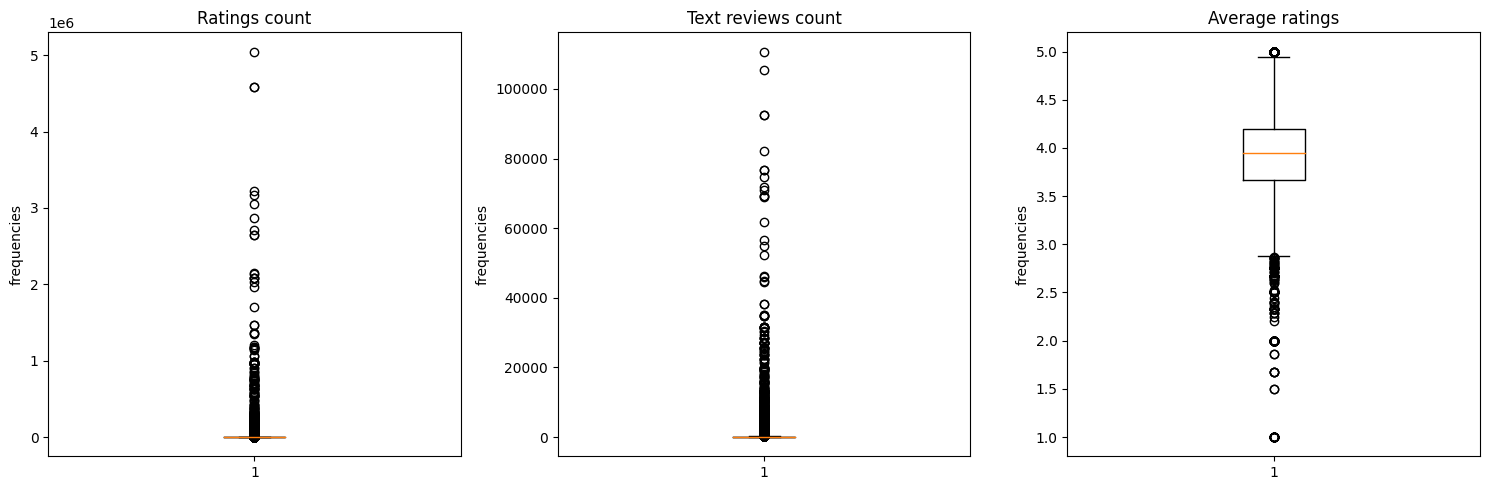

In [80]:
#Let's clean a bit the data first
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

for chunk in chunks:
  chunk["average_rating"].replace('', np.NaN, inplace = True)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)
  chunk["text_reviews_count"].replace('', np.NaN, inplace = True)
  chunk["ratings_count"].replace('', np.NaN, inplace = True)

  chunk = chunk[~chunk["average_rating"].isna()]
  chunk = chunk[~chunk["text_reviews_count"].isna()]
  chunk = chunk[~chunk["ratings_count"].isna()]

  ch = chunk[["text_reviews_count","average_rating", "ratings_count"]]


#define plotting region (1 rows, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#create boxplot without outliers in each subplot
axs[0].boxplot(chunk["ratings_count"])
axs[0].set_title('Ratings count')
axs[0].set_ylabel('frequencies')

axs[1].boxplot(chunk["text_reviews_count"])
axs[1].set_title('Text reviews count')
axs[1].set_ylabel('frequencies')

axs[2].boxplot(chunk["average_rating"])
axs[2].set_title('Average ratings')
axs[2].set_ylabel('frequencies')

# Show the plot
plt.tight_layout()
plt.show()

*Boxplot without the outliers*
> From the boxplots above we can see that among the 3 representations the Average ratings is the distribution that has less outliers, the other two have so many outliers that we can't even see the box. \\
In order to actually see the distributions we represent the boxplot without showing the ouliers, with the option showfliers = False:

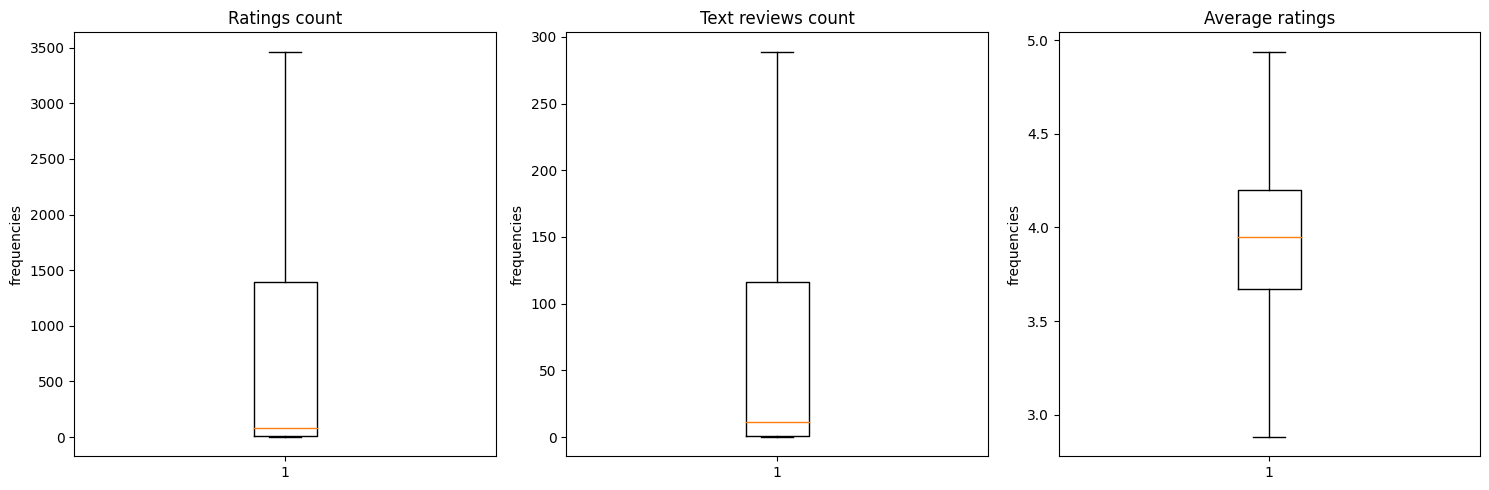

In [82]:
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

for chunk in chunks:
  chunk["average_rating"].replace('', np.NaN, inplace = True)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)
  chunk["text_reviews_count"].replace('', np.NaN, inplace = True)
  chunk["ratings_count"].replace('', np.NaN, inplace = True)

  chunk = chunk[~chunk["average_rating"].isna()]
  chunk = chunk[~chunk["text_reviews_count"].isna()]
  chunk = chunk[~chunk["ratings_count"].isna()]

  ch = chunk[["text_reviews_count","average_rating", "ratings_count"]]

#define plotting region (1 rows, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#create boxplot without outliers in each subplot
axs[0].boxplot(chunk["ratings_count"], showfliers = False)
axs[0].set_title('Ratings count')
axs[0].set_ylabel('frequencies')

axs[1].boxplot(chunk["text_reviews_count"], showfliers = False)
axs[1].set_title('Text reviews count')
axs[1].set_ylabel('frequencies')

axs[2].boxplot(chunk["average_rating"], showfliers = False)
axs[2].set_title('Average ratings')
axs[2].set_ylabel('frequencies')

# Show the plot
plt.tight_layout()
plt.show()

> We can see that there is an evident positive skeweness in the ratings_count and text_reviews_count distribution, while the average_rating distribution seems to have no skeweness. All the distributions have positive values. \\
The ratings_count and text_reviews_count have a wider range of values than the average_rating for obivous reasons.

> From the quartiles we can also say that, while the average ratings probabily has a bell-like distribution, the ratings count and the text reviews count have the majority of their observations concentrated towards the lower values.

**Histogram**

> We can try and plot the histograms for the average_ratings, text_reviews_count and rating_count columns and compare them to the boxplot made above to have a better insight on their distribution.

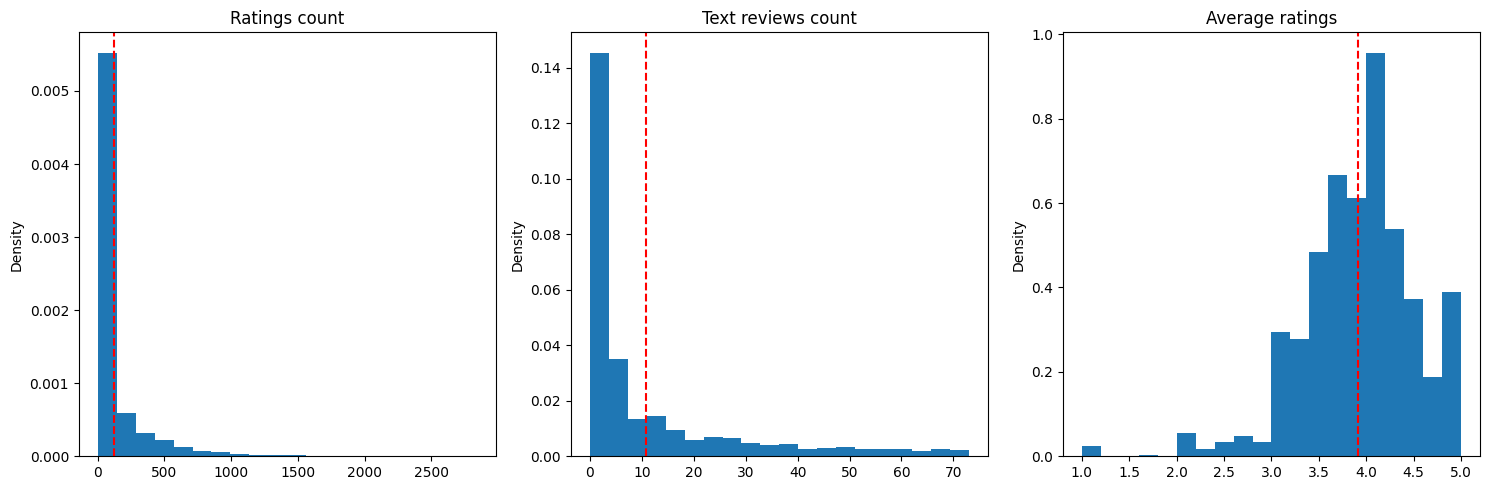

In [83]:
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

for chunk in chunks:
  chunk["average_rating"].replace('', np.NaN, inplace = True)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)
  chunk["text_reviews_count"].replace('', np.NaN, inplace = True)
  chunk["ratings_count"].replace('', np.NaN, inplace = True)

  chunk = chunk[~chunk["average_rating"].isna()]
  chunk = chunk[~chunk["text_reviews_count"].isna()]
  chunk = chunk[~chunk["ratings_count"].isna()]

  #To filter out outliers values
  Q1 = chunk['ratings_count'].quantile(0.25)
  Q3 = chunk['ratings_count'].quantile(0.75)
  IQR = Q3 - Q1

  chunk = chunk[~((chunk['ratings_count'] < (Q1 - 1.5 * IQR)) | (chunk['ratings_count'] > (Q3 + 1.5 * IQR)))]

  Q_1 = chunk['text_reviews_count'].quantile(0.25)
  Q_3 = chunk['text_reviews_count'].quantile(0.75)
  IQR_ = Q_3 - Q_1

  chunk = chunk[~((chunk['text_reviews_count'] < (Q_1 - 1.5 * IQR_)) | (chunk['text_reviews_count'] > (Q_3 + 1.5 * IQR_)))]

  ch = chunk[["text_reviews_count","average_rating", "ratings_count"]]

ratings_count_mean = ch["ratings_count"].mean()
text_reviews_count_mean = ch["text_reviews_count"].mean()
average_rating_mean = ch["average_rating"].mean()

#Define plotting region
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#create density histograms in each subplot
axs[0].hist(chunk["ratings_count"], bins=20, density = True)
axs[0].axvline(x =ratings_count_mean, color='red', linestyle='--')
axs[0].set_title('Ratings count')
axs[0].set_ylabel('Density')

axs[1].hist(chunk["text_reviews_count"], bins=20, density = True)
axs[1].axvline(x=text_reviews_count_mean, color='red', linestyle='--')
axs[1].set_title('Text reviews count')
axs[1].set_ylabel('Density')

axs[2].hist(chunk["average_rating"], bins=20, density = True)
axs[2].axvline(x=average_rating_mean, color='red', linestyle='--')
axs[2].set_title('Average ratings')
axs[2].set_ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


> The positive skeweness we found by looking at the boxplot also appears in the histogram plot. \\
We can also see that the major of the observations for the ratings count and the text reviews count distributions are towards the lower values, obiviously not centered around the mean. \\
The average ratings distribution has a bell shape centered around the mean.


**Barplot**

> We can also try a barplot for the languages column:

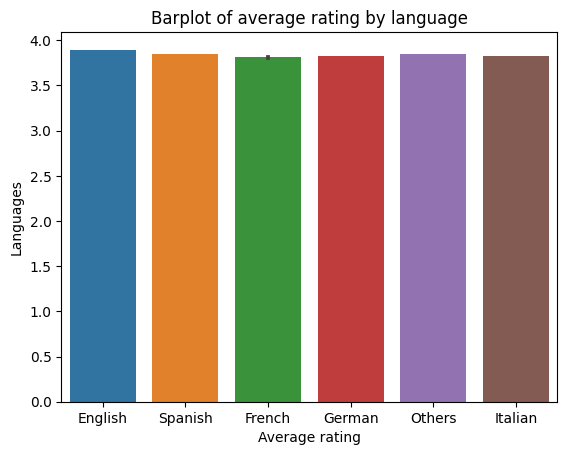

In [10]:
#Let's clean the language first:
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

def language_translate(language):
  if language == "English" or language == "eng" or language == "en" or language == "en-US" or language == "en-GB" or language == "en-CA" or language == "en-IN":
    return "English"
  elif language == "ger":
    return "German"
  elif language == "ita":
    return "Italian"
  elif language == "spa":
    return "Spanish"
  elif language == "fre":
    return "French"
  elif language == '':
    return np.NaN
  else:
    return "Others"

chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

language_df = pd.DataFrame()
for chunk in chunks:
  chunk["language"] = chunk["language"].astype(str)
  chunk["language"] = chunk["language"].map(language_translate)
  chunk["average_rating"].replace('', np.NaN, inplace = True)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)

  chunk = chunk[~chunk["language"].isna()]
  chunk = chunk[~chunk["average_rating"].isna()]
  language_df = pd.concat([language_df, chunk[["language", "average_rating"]]])

sns.barplot(x = language_df['language'], y = language_df['average_rating'])

plt.xlabel('Average rating')
plt.ylabel('Languages')
plt.title('Barplot of average rating by language')
plt.show()

> We can see that the average rating it's actually almost the same in all the languages represented, with minimal differences.

##**[RQ8]** ***Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.***

###**RQ 8.1**
**Can you demonstrate that readers usually rate the longest books as the worst?**

To answer this question we can try to compute the correlation coefficient to check if there is some sort of correlation between the length of the book (number of pages) and the ratings (average ratings).

> The correlation coefficient ranges from -1 to 1. \\
A positive correlation coefficient indicates that as the number of pages increases, the average rating also increases, while a negative correlation coefficient indicates that as the number of pages increases, the average rating decreases. \\
If the correlation coefficient is close to -1, it means that there is a strong negative correlation between the number of pages and the average rating, which suggests that readers usually rate the longest books as the worst

We will filter out the outliers of the number of pages distribution with the interquartile range method.


In [86]:
#Let's compute the correlation coefficient
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

whole_df = []
for chunk in chunks:
  #Let's do some data cleaning before getting into the correlation
  chunk["num_pages"].replace('', np.NaN, inplace = True)
  chunk["num_pages"] = chunk["num_pages"].astype(float)
  chunk["num_pages"].replace(0.00, np.NaN, inplace = True)
  chunk["average_rating"].replace('', np.NaN, inplace = True)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)

  chunk = chunk[~chunk["num_pages"].isna()]
  chunk = chunk[~chunk["average_rating"].isna()]

  #To filter out outliers values
  Q1 = chunk['num_pages'].quantile(0.25)
  Q3 = chunk['num_pages'].quantile(0.75)
  IQR = Q3 - Q1

  chunk = chunk[~((chunk['num_pages'] < (Q1 - 1.5 * IQR)) | (chunk['num_pages'] > (Q3 + 1.5 * IQR)))]

  ch = chunk[["num_pages","average_rating"]]
  whole_df.append(ch) #put chunks in a list

books_df = pd.concat(whole_df) # Concatenate the chunks into a single DataFrame
corr_coeff = books_df["num_pages"].corr(books_df["average_rating"]) # Compute the correlation coefficient

print("\033[1m" + "The correlation coefficient is:" + "\033[0m" + str(corr_coeff)) #0.06024192758027851

The correlation coefficien is:0.06024192758027851


> The correlation coefficient we obtained (0.06024192758027851) is telling us that effectively there is no strong linear trend between the variables "average rating" and "number of pages". \\
The sign of the coefficient is positive, which suggests that as one variable increases the other variable tends to increase too. \\
Also, since the absolute value of the coefficient is very close to 0, the relationship between the two variables can be described as "very weak".


We can now try to do a scatterplot and a linear regression to see if they overlap.
If they don't overlap it means, as we just saw with the correlation coefficient, that the two variables don't have a linear relationship.

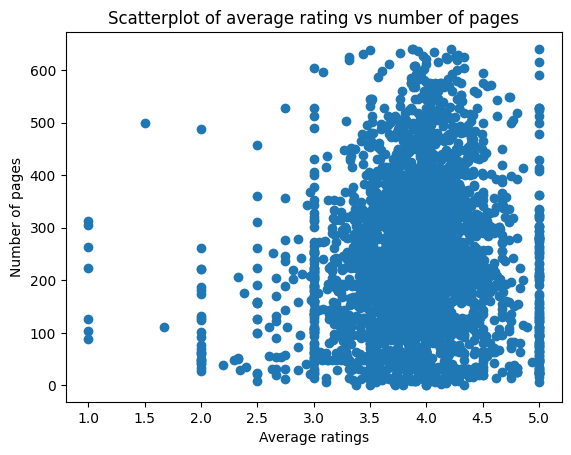

In [87]:
#scatterplot
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

for chunk in chunks:
  #Let's do some data cleaning before getting into the correlation
  chunk["num_pages"].replace('', np.NaN, inplace = True)
  chunk["num_pages"] = chunk["num_pages"].astype(float)
  chunk["num_pages"].replace(0.00, np.NaN, inplace = True)
  #chunk["num_pages"] = pd.to_numeric(chunk["num_pages"], errors='coerce') #because it's an object datatype
  chunk["average_rating"].replace('', np.NaN, inplace = True)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)

  chunk = chunk[~chunk["num_pages"].isna()]
  chunk = chunk[~chunk["average_rating"].isna()]

  #To filter out outliers values
  Q1 = chunk['num_pages'].quantile(0.25)
  Q3 = chunk['num_pages'].quantile(0.75)
  IQR = Q3 - Q1

  chunk = chunk[~((chunk['num_pages'] < (Q1 - 1.5 * IQR)) | (chunk['num_pages'] > (Q3 + 1.5 * IQR)))]

  ch = chunk[["num_pages","average_rating"]]

#Scatterplot
plt.scatter(ch['average_rating'], ch['num_pages'])

plt.xlabel('Average ratings')
plt.ylabel('Number of pages')
plt.title('Scatterplot of average rating vs number of pages')
plt.show()

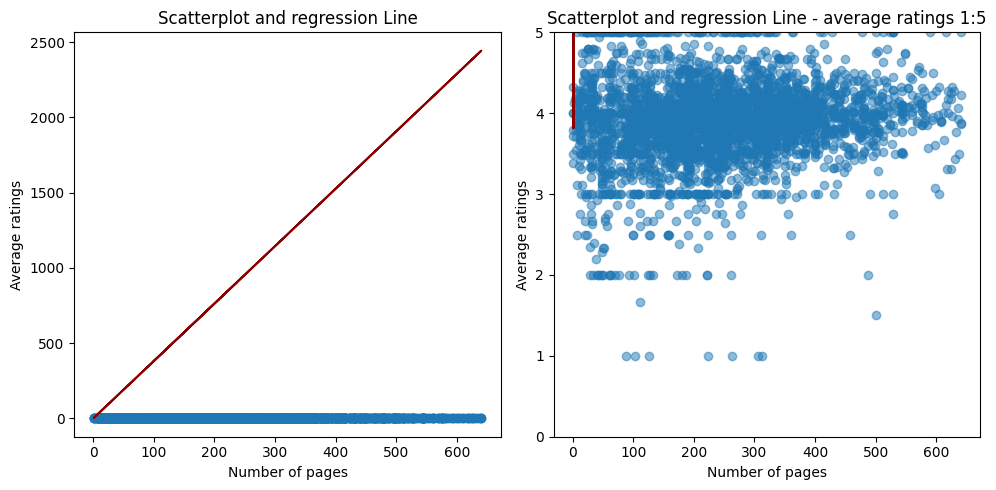

In [13]:
#Linear regression
chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

for chunk in chunks:
  #Let's do some data cleaning before getting into the correlation
  chunk["num_pages"].replace('', np.NaN, inplace = True)
  chunk["num_pages"] = chunk["num_pages"].astype(float)
  chunk["num_pages"].replace(0.00, np.NaN, inplace = True)
  #chunk["num_pages"] = pd.to_numeric(chunk["num_pages"], errors='coerce') #because it's an object datatype
  chunk["average_rating"].replace('', np.NaN, inplace = True)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)

  chunk = chunk[~chunk["num_pages"].isna()]
  chunk = chunk[~chunk["average_rating"].isna()]

  #To filter out outliers values
  Q1 = chunk['num_pages'].quantile(0.25)
  Q3 = chunk['num_pages'].quantile(0.75)
  IQR = Q3 - Q1

  chunk = chunk[~((chunk['num_pages'] < (Q1 - 1.5 * IQR)) | (chunk['num_pages'] > (Q3 + 1.5 * IQR)))]

  ch = chunk[["num_pages","average_rating"]]

#Let's fit a linear regression model using OLS (Ordinary LEast Square) function:
import statsmodels.formula.api as smf

model = smf.ols(formula='average_rating ~ num_pages', data= ch).fit()

#regression model
m, b = model.params
x = ch['num_pages']
y_pred = m*x + b

#Let's plot the scatterplot and the regresion model:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the scatterplot and the regression line for the first subplot
axs[0].scatter(x, ch['average_rating'], alpha=0.5) #alpha = 0.5 -> makes the scatterplot a bit transparent
axs[0].plot(x, y_pred, color='darkred')
axs[0].set_xlabel('Number of pages')
axs[0].set_ylabel('Average ratings')
axs[0].set_title('Scatterplot and regression Line')

# Create the scatterplot and the regression line for the second subplot
axs[1].scatter(x, ch['average_rating'], alpha=0.5)
axs[1].plot(x, y_pred, color='darkred')
axs[1].set_xlabel('Number of pages')
axs[1].set_ylabel('Average ratings')
axs[1].set_title('Scatterplot and regression Line - average ratings 1:5')
axs[1].set_ylim([0,5])

plt.tight_layout()
plt.show()


> We can see from the plots that the scatterplot and the linear regression don't overlap.

> This means that the linear model doesn't capture the relationship between the lenght of the books (represented by the number of pages) and the average ratings.

We can now assert that both the correlation coefficient and the visual representations tells us that the relationship between lenght of the books and the average ratings is not linear.

###**RQ 8.2**
***Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?***

In [89]:
#Let's do some data cleaning on the languages first:

def language_translate(language):
  if language == "English" or language == "eng" or language == "en" or language == "en-US" or language == "en-GB" or language == "en-CA" or language == "en-IN":
    return "English"
  elif language == '':
    return np.NaN
  else :
    return "Non-English"

chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

language_df = pd.DataFrame()
for chunk in chunks:
  chunk["language"] = chunk["language"].astype(str)
  chunk["language"] = chunk["language"].map(language_translate)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)
  chunk = chunk[~chunk["language"].isna()]
  chunk = chunk[~chunk["average_rating"].isna()]
  language_df = pd.concat([language_df, chunk[["language", "average_rating"]]])

#Let's compute the Kologorv-smirnov test with the "two-sided" method, in which the hypothesis are the following:
#Null hypothesis = the two distributions are identical, F(x)=G(x) for all x
#Alternative hypothesis = the distributions are not identical

from scipy import stats
from scipy.stats import ks_2samp

english_books = language_df[language_df["language"] == "English"]
non_english_books = language_df[language_df["language"] == "Non-English"]

kolmogorov_smirnov = ks_2samp(english_books["average_rating"]*len(english_books), non_english_books["average_rating"]*len(non_english_books))
t_test = stats.ttest_ind(english_books["average_rating"], non_english_books["average_rating"], equal_var = False, alternative= 'two-sided')
#Based on the p-value returned we can draw our conclusions


In [90]:
print("\033[1m" + "Result of the Kolmogorv-smirnov test:" + "\033[0m" + str(kolmogorov_smirnov)) #KstestResult(statistic=0.8447379437280342, pvalue=0.0, statistic_location=4962735.0, statistic_sign=-1)
print("\033[1m" + "Result of the  t-test:" + "\033[0m" + str(t_test)) #TtestResult(statistic=93.74888774331474, pvalue=0.0, df=2387170.745196682)

Result of the Kolmogorv-smirnov test:KstestResult(statistic=0.8447379437280342, pvalue=0.0, statistic_location=4962735.0, statistic_sign=-1)
Result of the  t-test:TtestResult(statistic=93.74888774331474, pvalue=0.0, df=2387170.745196682)


> The **Kolmogorov-Smirnov test** is a nonparametric goodness-of-fit test used to determine whether two distributions differ and it's particularly useful when you have two samples coming from two populations that can be different. \\
> Since the p-value we got for this test is < 0.05 we can reject the null hypothesis and conclude that the average rate English and non-English books distributions are different.

> Another test we can try is the  **T-test**, which is used to determine if there is a difference between the mean of two distributions. \\
We choose the "two sample test" option, that is used to compare the means of two independent groups.
With the p-value we got from this test (< 0.05) we can reject the null hypothesis and say that we have evidence to conclude that the average ratings of English books and non-English books are different.

###**RQ 8.3**
***About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.***

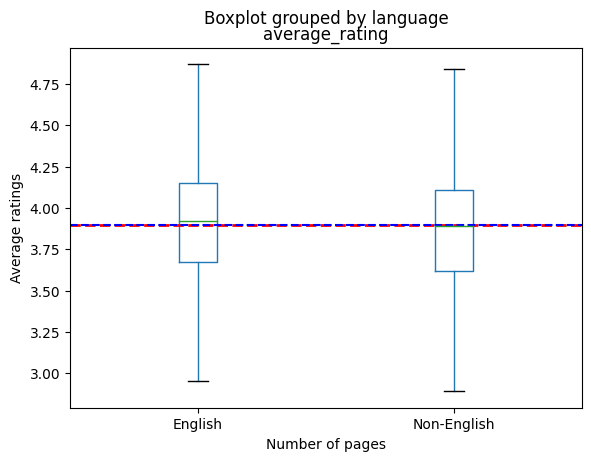

English books mode:4.0
Non-English books mode:4.0
Non-English books statistical summary:
count    1.102830e+06
mean     3.839130e+00
std      4.664131e-01
min      1.000000e+00
25%      3.620000e+00
50%      3.890000e+00
75%      4.110000e+00
max      5.000000e+00
Name: average_rating, dtype: float64
English books statistical summary:
count    1.456822e+06
mean     3.894574e+00
std      4.713672e-01
min      1.000000e+00
25%      3.670000e+00
50%      3.920000e+00
75%      4.150000e+00
max      5.000000e+00
Name: average_rating, dtype: float64


In [91]:
#Let's do some data cleaning on the languages first:
def language_translate(language):
  if language == "English" or language == "eng" or language == "en" or language == "en-US" or language == "en-GB" or language == "en-CA" or language == "en-IN":
    return "English"
  elif language == '':
    return np.NaN
  else :
    return "Non-English"

chunks = pd.read_json(filepath_books, lines = True, chunksize = 10000)

language_df = pd.DataFrame()

for chunk in chunks:
  chunk["language"] = chunk["language"].astype(str)
  chunk["language"] = chunk["language"].map(language_translate)
  chunk["average_rating"].replace(0.00, np.NaN, inplace = True)
  chunk = chunk[~chunk["language"].isna()]
  chunk = chunk[~chunk["average_rating"].isna()]
  language_df = pd.concat([language_df, chunk[["language", "average_rating"]]])

english_books = language_df[language_df["language"] == "English"]
non_english_books = language_df[language_df["language"] == "Non-English"]

#Now let's compute the boxplot
english_books_mean = english_books["average_rating"].mean()
non_english_books_mean = english_books["average_rating"].mean()
boxplot = language_df.boxplot(column='average_rating', by='language', grid=False, showfliers = False)

plt.axhline(y=english_books_mean, color='r', linestyle='--', linewidth = 2)
plt.axhline(y=non_english_books_mean, color='b', linestyle='--')

plt.xlabel('Number of pages')
plt.ylabel('Average ratings')
plt.show()

#Since we can't extrapolate the mode and the mean from the boxplot we can compute them:
english_books_mode = english_books["average_rating"].mode().values[0]
print("\033[1m" + "English books mode:" + "\033[0m" + str(english_books_mode))

non_english_books_mode = non_english_books["average_rating"].mode().values[0]
print("\033[1m" + "Non-English books mode:" + "\033[0m" + str(non_english_books_mode))

#for the other statistics:
print("\033[1m" + "Non-English books statistical summary:" + "\033[0m\n" + str(non_english_books["average_rating"].describe()))
print("\033[1m" + "English books statistical summary:" + "\033[0m\n" + str(english_books["average_rating"].describe()))

> The boxplot is a type of plot that summarises the best the distribution of a dataset, by displaying a box with its five-number summary: the minimum, the first quartile (Q1), the median (Q2), the third quartile (Q3), and the maximum. \\
It also shows the outliers and the distribution positive, null or negative skeweness based on the position of the median value.

1.   The **minimum** is the smallest value in the dataset, excluding any outliers.
2.   The **first Quartile (Q1)** corresponds to the 25th percentile.
3.   The **median** is the middle value in the dataset when the values are ordered, and it corresponds to the 50th percentile **(Q2)**.
4.   The **third Quartile (Q3)** corresponds to the 75th percentile.
5.   The **maximum** is the largest value in the dataset, excluding any outliers.

> The box in the boxplot represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The line inside the box represents the median (Q2). The whiskers represent the range of the data within 1.5 times the IQR. Any data points outside this range are considered outliers and are represented as individual points on the plot.

> Other important statistical values that are not represented in the boxplot but can be retrieved with the describe() function are the mode and the mean. \\
The **mode** is the most frequently occurring value in the dataset, while the **mean** is the sum of all the values in the dataset divided by the number of values.



###**RQ 8.4**
***It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.***

We can tackle this problem by doing a linear regression analysis on the fans_count and text_reviews_count, and on the fans_count and ratings_count to see if they have a linear relationship:

In [94]:
#Linear regression on text_reviews

#Let's fit a linear regression model using OLS (Ordinary LEast Square) function:
import statsmodels.formula.api as smf

model_text_review = smf.ols(formula='text_reviews_count ~ fans_count', data = authors).fit()

#regression model
m, b = model.params
x = authors['fans_count']
y_pred = m*x + b

print("\033[1m" + "fan - text review Linear regression:" + "\033[0m\n" + str(model_text_review.summary()))


#Linear regression on rating_count
model_rating = smf.ols(formula='ratings_count ~ fans_count', data = authors).fit()

#regression model
a, b = model.params
x = authors['fans_count']
y_pred = a*x + b

print("\033[1m" + "fan - ratings Linear regression:" + "\033[0m\n" + str(model_rating.summary()))

fan - text review Linear regression:
                            OLS Regression Results                            
Dep. Variable:     text_reviews_count   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                 3.814e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:53:51   Log-Likelihood:            -8.9942e+05
No. Observations:              189953   AIC:                         1.799e+06
Df Residuals:                  189951   BIC:                         1.799e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      

> From the results we obtained with the regression analysis summary, and in particular by looking at the fans_count coefficient, we can say that the fans of the authors of this dataset are a bit lazy. \\
> That is because the coefficient of fans_count from linear regression 'ratings_count ~ fans_count' is much higher than the one of the linear regression 'text_reviews_count ~ fans_count'.

> In particular the fans_count coefficient (7.4041) from 'ratings_count ~ fans_count' means that for each additional fan, the ratings_count is expected to increase by 21.3144 units, assuming all other variables remain constant. On the other hand fans_count coefficient (1.6025) from the 'text_reviews_count ~ fans_count' means that for each additional fan, the text_reviews_count is expected to increase by 1.0064 units, assuming all other variables remain constant. \\
This result points out that, for each additional fan, there are more ratings than text reviews count.



>

###**RQ 8.5**
***Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.***

Hypothesis testing is a fundamental concept in statistics, which is used to determine whether a predictor variable has a statistically significant relationship with an outcome variable. \\
Parametric and nonparametric test are two of the main types of statistical tests used in hypothesis testing; the choice between one of them is determined by the data's nature and the assumptions that can be made about the data.

\\
> **Parametric tests** are used when the data follow a specific distribution, usually the normal distribution. They are based on the assumption that we have prior knowledge of the population distribution, or if not, we can approximate it to a normal distribution with the help of the Central Limit Theorem. \\
Parametric tests have greater statistical power and include *regression tests*, *comparison tests*, and *correlation tests*.

\\
> **Non-parametric tests** don't make many assumptions about the data and are useful when one or more of the common statistical assumptions are violated, for example when the data do not follow the normal distribution, or when the sample size isn't large enough to satisfy the requirements for parametric tests.   
The inferences they make aren't as strong as with parametric tests.

> The non-parametric tests include the *median test for one sample*, *comparison of two paired samples*, *comparison of two independent samples*, and *comparison of three or more samples*. \\

Following a decision tree to choose the right statistical test for our data:
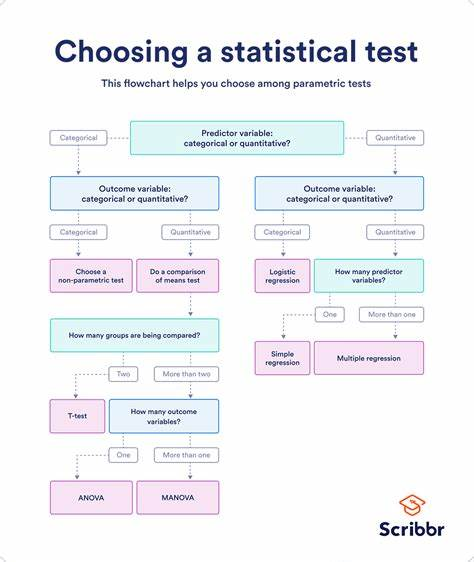











>



